# CS760 HW4 CODE
**Author: Jiahui Zhang**

In [53]:
import numpy as np
from copy import deepcopy

root = 'D:\\LIFE\\WORK\\5-Doctorate\\Coursework\\CS 760\\hw_CS760_Jiahui Zhang\\CS760_HW4\\'


## Naive Bayes

In [54]:
# Training using 0~9 samples

ALPHA = 1/2
VOCAB = 'abcdefghijklmnopqrstuvwxyz '
DICT = {}
for letter in VOCAB:
    DICT[letter] = 0

lang_dict = {}
lang_est = {}
for lang in ['e','j','s']:
    lang_dict[lang] = deepcopy(DICT)
    lang_est[lang] = deepcopy(DICT)
    for i in range(10):
        file = root + 'languageID\\%s%d.txt' % (lang,i)
        with open(file,'r') as f:
            for line in f:
                line = line.replace('\n','')
                if len(line) == 0:
                    continue
                line = list(line)
                for item in line:
                    if item in lang_dict[lang].keys():
                        lang_dict[lang][item] += 1
    summation = sum(list(lang_dict[lang].values()))
    for letter in lang_est[lang].keys():
        lang_est[lang][letter] = (lang_dict[lang][letter] + ALPHA)/(summation + ALPHA*27)
    #for letter in lang_est[lang].keys():
    #    print("P(%s|%s): %.2f\\%%" % (letter,lang,lang_est[lang][letter]*100))


In [55]:
# Testing using sample 10

lang_test_vec = {}
for lang in ['e','j','s']:
    lang_test_vec[lang] = deepcopy(DICT)
    file = root + 'languageID\\%s%d.txt' % (lang,10)
    with open(file,'r') as f:
        for line in f:
            line = line.replace('\n','')
            if len(line) == 0:
                continue
            line = list(line)
            for item in line:
                if item in lang_test_vec[lang].keys():
                    lang_test_vec[lang][item] += 1

print(lang_test_vec)



{'e': {'a': 164, 'b': 32, 'c': 53, 'd': 57, 'e': 311, 'f': 55, 'g': 51, 'h': 140, 'i': 140, 'j': 3, 'k': 6, 'l': 85, 'm': 64, 'n': 139, 'o': 182, 'p': 53, 'q': 3, 'r': 141, 's': 186, 't': 225, 'u': 65, 'v': 31, 'w': 47, 'x': 4, 'y': 38, 'z': 2, ' ': 498}, 'j': {'a': 186, 'b': 9, 'c': 8, 'd': 19, 'e': 100, 'f': 5, 'g': 24, 'h': 54, 'i': 155, 'j': 4, 'k': 81, 'l': 2, 'm': 68, 'n': 70, 'o': 131, 'p': 0, 'q': 0, 'r': 68, 's': 66, 't': 103, 'u': 106, 'v': 1, 'w': 34, 'x': 0, 'y': 19, 'z': 7, ' ': 181}, 's': {'a': 184, 'b': 22, 'c': 55, 'd': 75, 'e': 195, 'f': 7, 'g': 8, 'h': 7, 'i': 81, 'j': 14, 'k': 1, 'l': 96, 'm': 43, 'n': 87, 'o': 128, 'p': 49, 'q': 15, 'r': 113, 's': 107, 't': 64, 'u': 50, 'v': 13, 'w': 0, 'x': 4, 'y': 4, 'z': 5, ' ': 279}}


In [56]:
# Estimated probability

for lang in ['e','j','s']:
    log_p = 0
    for letter in DICT.keys():
        log_p += lang_test_vec['e'][letter] * np.log(lang_est[lang][letter])
    print("Language %s log prob:"%lang,log_p)


Language e log prob: -7841.865447060635
Language j log prob: -8771.433079075032
Language s log prob: -8467.282044010557


In [57]:
# Three language test set

mixed_test_vec = {}
for lang in ['e','j','s']:
    for no in range(10,20):
        mixed_test_vec[(lang,no)] = deepcopy(DICT)
        file = root + 'languageID\\%s%d.txt' % (lang,no)
        with open(file,'r') as f:
            for line in f:
                line = line.replace('\n','')
                if len(line) == 0:
                    continue
                line = list(line)
                for item in line:
                    if item in mixed_test_vec[(lang,no)].keys():
                        mixed_test_vec[(lang,no)][item] += 1
        
        log_p_dict = {'e':0,'j':0,'s':0}
        max_pred = None
        max_log_p = -100000
        for tlang in ['e','j','s']:
            log_p = 0
            for letter in DICT.keys():
                log_p += mixed_test_vec[(lang,no)][letter] * np.log(lang_est[tlang][letter])
            log_p_dict[tlang] = log_p
            if log_p >= max_log_p:
                max_log_p = log_p
                max_pred = tlang
        print("Current sample:",lang,no," Pred:",max_pred)



Current sample: e 10  Pred: e
Current sample: e 11  Pred: e
Current sample: e 12  Pred: e
Current sample: e 13  Pred: e
Current sample: e 14  Pred: e
Current sample: e 15  Pred: e
Current sample: e 16  Pred: e
Current sample: e 17  Pred: e
Current sample: e 18  Pred: e
Current sample: e 19  Pred: e
Current sample: j 10  Pred: j
Current sample: j 11  Pred: j
Current sample: j 12  Pred: j
Current sample: j 13  Pred: j
Current sample: j 14  Pred: j
Current sample: j 15  Pred: j
Current sample: j 16  Pred: j
Current sample: j 17  Pred: j
Current sample: j 18  Pred: j
Current sample: j 19  Pred: j
Current sample: s 10  Pred: s
Current sample: s 11  Pred: s
Current sample: s 12  Pred: s
Current sample: s 13  Pred: s
Current sample: s 14  Pred: s
Current sample: s 15  Pred: s
Current sample: s 16  Pred: s
Current sample: s 17  Pred: s
Current sample: s 18  Pred: s
Current sample: s 19  Pred: s


In [58]:
# Shuffle Test
## using english 10

lang_test_vec = deepcopy(DICT)
file = root + 'languageID\\%s%d.txt' % ('e',10)
doc = ''
with open(file,'r') as f:
    for line in f:
        line = line.replace('\n','')
        if len(line) == 0:
            continue
        doc += line

doc = list(doc)
doc = np.random.choice(doc,size=len(doc),replace=False)
print(doc)

for item in doc:
    if item in lang_test_vec.keys():
        lang_test_vec[item] += 1

print(lang_test_vec)

for lang in ['e','j','s']:
    log_p = 0
    for letter in DICT.keys():
        log_p += lang_test_vec[letter] * np.log(lang_est[lang][letter])
    print("Language %s log prob:"%lang,log_p)


['n' 'h' 'n' ... 'l' 'a' 'p']
{'a': 164, 'b': 32, 'c': 53, 'd': 57, 'e': 311, 'f': 55, 'g': 51, 'h': 140, 'i': 140, 'j': 3, 'k': 6, 'l': 85, 'm': 64, 'n': 139, 'o': 182, 'p': 53, 'q': 3, 'r': 141, 's': 186, 't': 225, 'u': 65, 'v': 31, 'w': 47, 'x': 4, 'y': 38, 'z': 2, ' ': 498}
Language e log prob: -7841.865447060635
Language j log prob: -8771.433079075032
Language s log prob: -8467.282044010557


## Simple Neural Network

In [59]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
import matplotlib.pyplot as plt
from tqdm import tqdm

mnist_data_train = datasets.MNIST(root='data',train=True,download=False)
mnist_data_test = datasets.MNIST(root='data',train=False,download=False)


In [60]:
from scipy.special import softmax
def sigmoid(x):
    return np.where(x >= -100, 
                    1 / (1 + np.exp(-x)), 
                    0)
def d_sigmoid(z):
    return sigmoid(z) * (1-sigmoid(z))

In [61]:
class myNeuralNetwork:
    # lr=1e-5, tol=1e-9, batch=128 works. but too slow
    # lr=1e-1 seems too large for d2=200, d1=300. but trend is good! sleep! 
    def __init__(self,x,y,lr=1e-2,tol=1e-18,batchsize=128,d2=200,d1=300,tmax=500):
        self.x = x # shape: d*n
        self.y = y # shape: k*n
        self.lr = lr
        self.tol = tol
        self.batchsize = batchsize
        self.weight1 = np.random.randn(d1,self.x.shape[0]) # shape: d1*d
        self.weight2 = np.random.randn(d2,d1) # shape: d2*d1
        self.weight3 = np.random.randn(self.y.shape[0],d2) # shape: k*d2
        self.output = np.zeros(self.y.shape) # shape: k*n
        self.d2 = d2
        self.d1 = d1
        self.tmax = tmax
        self.loss_track = []
        self.hidden1 = np.zeros([d1,self.x.shape[1]]) # shape: d1*n
        self.hidden2 = np.zeros([d2,self.x.shape[1]]) # shape: d2*n

    def test(self,test_x,test_y):
        self.test_output = np.zeros(test_y.shape)
        for i in tqdm(range(test_x.shape[1])):
            hidden1 = sigmoid(np.dot(self.weight1,test_x[:,i])) # shape: d1
            hidden2 = sigmoid(np.dot(self.weight2,hidden1)) # shape: d2
            single_output = softmax(np.dot(self.weight3,hidden2)) # shape: k
            self.test_output[:,i] = single_output
        test_loss = -np.sum(test_y * np.log(self.test_output)) / test_y.shape[1]
        print("Test loss:",test_loss)

    def feedforward(self):
        for i in range(self.x.shape[1]):
            self.hidden1[:,i] = sigmoid(np.dot(self.weight1,self.x[:,i])) # shape: d1
            self.hidden2[:,i] = sigmoid(np.dot(self.weight2,self.hidden1[:,i])) # shape: d2
            self.output[:,i] = softmax(np.dot(self.weight3,self.hidden2[:,i])) # shape: k

    def calloss(self):
        self.loss = -np.sum(self.y * np.log(self.output)) / self.y.shape[1]

    def backprop(self,x_index):
        d_hidden3 = self.output[:,x_index] - self.y[:,x_index] # shape: k
        #print(d_hidden3.shape)
        d_weight3 = np.outer(d_hidden3, sigmoid(self.hidden2[:,x_index])) # shape: k*d2
        #print(d_weight3.shape)
        d_hidden2 = np.dot(d_hidden3, self.weight3) * d_sigmoid(self.hidden2[:,x_index]) # shape: d2
        #print(d_hidden2.shape)
        d_weight2 = np.outer(d_hidden2, sigmoid(self.hidden1[:,x_index])) # shape: d2*d1
        #print(d_weight2.shape)
        d_hidden1 = np.dot(d_hidden2, self.weight2) * d_sigmoid(self.hidden1[:,x_index]) # shape: d1
        #print(d_hidden1.shape)
        d_weight1 = np.outer(d_hidden1, sigmoid(self.x[:,x_index])) # shape: d1*d
        #print(d_weight1.shape)

        self.weight1 -= d_weight1 * self.lr / self.batchsize
        self.weight2 -= d_weight2 * self.lr / self.batchsize
        self.weight3 -= d_weight3 * self.lr / self.batchsize

    def train(self):
        print("Start training =======")
        past_weight1 = np.ones([self.d1,self.x.shape[0]])
        past_weight2 = np.ones([self.d2,self.d1])
        past_weight3 = np.ones([self.y.shape[0],self.d2])
        t = 0
        self.loss_track = []
        while(np.sum((past_weight1-self.weight1)**2) + np.sum((past_weight2-self.weight2)**2) + np.sum((past_weight3-self.weight3)**2) > self.tol):
            print("Epoch %d ===" % t)
            past_weight1 = deepcopy(self.weight1)
            past_weight2 = deepcopy(self.weight2)
            past_weight3 = deepcopy(self.weight3)
            self.feedforward()
            batch_index = np.random.choice(list(range(self.x.shape[1])),self.batchsize,replace=False)
            for i in range(len(batch_index)):
                self.backprop(batch_index[i])
            self.calloss()
            self.loss_track.append(self.loss)
            print("Current loss:",self.loss)
            t += 1
            if t >= self.tmax:
                break
        plt.figure()
        plt.plot(self.loss_track)
        plt.title('Learning Curve')
        plt.show()
        


In [62]:
train_x = []
train_y = []
for i in range(10000):
    img, label = mnist_data_train[i]
    np_img = np.array(img).flatten()
    train_x.append(np_img)
    onehot_y = np.zeros(10)
    onehot_y[label] = 1
    train_y.append(onehot_y)
train_x = (np.array(train_x) / 255 - 0.5)*2
train_x = np.transpose(train_x)
train_y = np.array(train_y)
train_y = np.transpose(train_y)

test_x = []
test_y = []
for i in range(len(mnist_data_test)):
    img, label = mnist_data_test[i]
    np_img = np.array(img).flatten()
    test_x.append(np_img)
    onehot_y = np.zeros(10)
    onehot_y[label] = 1
    test_y.append(onehot_y)
test_x = (np.array(test_x) / 255 - 0.5)*2
test_x = np.transpose(test_x)
test_y = np.array(test_y)
test_y = np.transpose(test_y)

In [63]:
mynet = myNeuralNetwork(x=train_x,y=train_y)
mynet.train()
mynet.test(test_x,test_y)
print(mynet.test_output[:,:5])
print(test_y[:,:5])


Start training =======
Epoch 0 ===


KeyboardInterrupt: 

In [ ]:
correct_cnt = 0
for i in range(len(mnist_data_test)):
    pred = mynet.test_output[:,i]
    true = test_y[:,i]
    pred_y = np.where(pred==max(pred))
    true_y = np.where(true==1)
    if pred_y == true_y:
        correct_cnt += 1
print(correct_cnt/len(mnist_data_test))

0.3197
0.3228


## Simple Neural Network (using PyTorch)

In [75]:
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor

input_dim = 784
hidden_d1 = 300
hidden_d2 = 200
output_dim = 10

class torchNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_d1, hidden_d2, output_dim):
        super(torchNeuralNetwork,self).__init__()
        self.layer1 = nn.Linear(input_dim,hidden_d1,bias=False)
        #nn.init.kaiming_uniform_(self.layer1.weight, nonlinearity='sigmoid')
        self.layer2 = nn.Linear(hidden_d1,hidden_d2,bias=False)
        #nn.init.kaiming_uniform_(self.layer2.weight, nonlinearity='sigmoid')
        self.layer3 = nn.Linear(hidden_d2,output_dim,bias=False)

    def forward(self,x):
        x = torch.nn.functional.sigmoid(self.layer1(x))
        x = torch.nn.functional.sigmoid(self.layer2(x))
        x = torch.nn.functional.softmax(self.layer3(x))
        return x

torchnet = torchNeuralNetwork(input_dim, hidden_d1, hidden_d2, output_dim)
for param in torchnet.parameters():
    param.data.zero_()
print(torchnet)

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(torchnet.parameters(),lr=1e-2)

class Data(Dataset):
    def __init__(self,X,y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.len

train_data = Data(np.transpose(train_x), np.transpose(train_y))
train_dataloader = DataLoader(dataset=train_data, batch_size=128, shuffle=True)

loss_track = []
for t in tqdm(range(500)):
    for X, y in train_dataloader:
        optimizer.zero_grad()
        pred = torchnet(X)
        loss = loss_func(pred, y)
        loss_track.append(loss.item())
        loss.backward()
        optimizer.step()




torchNeuralNetwork(
  (layer1): Linear(in_features=784, out_features=300, bias=False)
  (layer2): Linear(in_features=300, out_features=200, bias=False)
  (layer3): Linear(in_features=200, out_features=10, bias=False)
)


  0%|          | 0/500 [00:00<?, ?it/s]c:\Users\jiahu\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\jiahu\AppData\Local\Temp\ipykernel_4304\2399658589.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.functional.softmax(self.layer3(x))
100%|██████████| 500/500 [01:56<00:00,  4.29it/s]


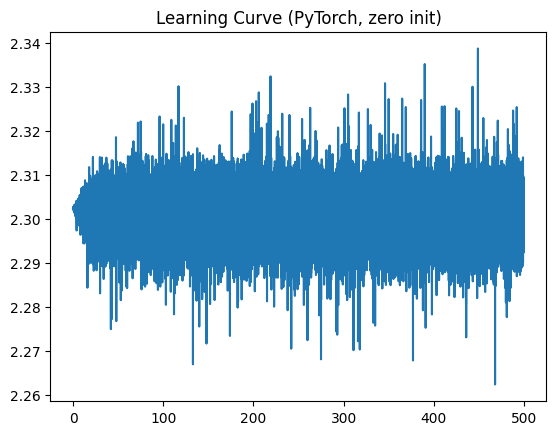

In [76]:
plt.figure()
plt.plot(np.linspace(0,500,len(loss_track)),loss_track)
plt.title('Learning Curve (PyTorch, zero init)')
plt.show()

In [77]:
test_data = Data(np.transpose(test_x), np.transpose(test_y))
test_dataloader = DataLoader(dataset=test_data, batch_size=10000, shuffle=True)

correct_cnt = 0
with torch.no_grad():
    for X, y in test_dataloader:
        outputs = torchnet(X)
        for i in range(10000):
            pred = outputs[i,:]
            pred_y = np.where(pred==max(pred))
            true_y = np.where(y[i,:]==1)
            if pred_y == true_y:
                correct_cnt +=1 

print("ACC:",correct_cnt/10000)

c:\Users\jiahu\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\jiahu\AppData\Local\Temp\ipykernel_4304\2399658589.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = torch.nn.functional.softmax(self.layer3(x))


ACC: 0.1135
